In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h3><em>Temperature and Pressure values</em></h3>

In [2]:
temperature = np.arange(-30, 40+0.1, 0.1) #temperature values for potential temperature and mixing ratio from -30 to 40 at a resolution of 0.1
temperature_K = temperature + 273.15 #converting temperature values to kelvin
pressure = np.arange(250, 1050+0.1, 1) #pressure values for potential temperature and mixing ratio from 250 to 1050 at a resolution of 1
pressure_pa = pressure*100  # converting pressure from hecto pascal to pascal

# len(temperature_K), len(pressure)

<h3><em>potential temperature function</em></h3>

In [3]:
def potential_temperature(po=1000, rd=287.05, cpd=1005.2):
    t = temperature_K.reshape(1, 701) # reshaped the temperature values to 2D
    p = pressure.reshape(801,1) #reshaped the pressure values to 2D
    theta = t*(po/p)**(rd/cpd) # calculated for potential temperature in 2D
    return theta

In [4]:
potential_temperature = potential_temperature()
potential_temperature.shape

(801, 701)

<h3><em>saturation vapor pressure function</em></h3>

In [5]:
def vapour_pressure():
    T = temperature_K; a = 0.58002206*10**4; b = 0.13914993*10**1; c = 0.48640239*10**-1; d = 0.41764768*10**-4; ed = 0.14452093*10**-7; f = 0.65459673*10**1
    log_es = -(a/T) + (b) - (c)*T + ((d)*(T**2)) - ((ed)*(T**3)) + ((f)*(np.log(T)))
    log_es
    # #taking the log of es
    es = np.exp(log_es)
    return es

In [6]:
vapour_pressure = vapour_pressure()

### _calculating for saturation mixing ratio_

In [7]:
rd = 287.05; rv = 461.51
ES = vapour_pressure.reshape(1, 701)
P = pressure_pa.reshape(801, 1)

In [8]:
saturation_mixing_ratio = (rd/rv)*(ES/(P-ES))
saturation_mixing_ratio

array([[0.00127296, 0.00128502, 0.00129719, ..., 0.25677548, 0.25872131,
        0.26068482],
       [0.00126788, 0.00127989, 0.00129201, ..., 0.25533251, 0.2572642 ,
        0.2592134 ],
       [0.00126284, 0.0012748 , 0.00128687, ..., 0.25390566, 0.25582342,
        0.2577585 ],
       ...,
       [0.00030319, 0.00030606, 0.00030895, ..., 0.04660366, 0.04687186,
        0.04714153],
       [0.0003029 , 0.00030577, 0.00030866, ..., 0.0465559 , 0.04682382,
        0.04709319],
       [0.00030261, 0.00030548, 0.00030836, ..., 0.04650825, 0.04677587,
        0.04704494]])

In [9]:
saturation_mixing_ratio.shape

(801, 701)

### _calculating for equivalent potential temperature_

In [10]:
def equivalent_potential_temperature():
    lvo = 2.5*10**6; cpd=1005.2
    inner = ( (lvo*saturation_mixing_ratio) / (cpd*temperature_K) )
    equivalent_potential_temperature = potential_temperature*np.exp(inner)
    return equivalent_potential_temperature

In [11]:
equivalent_potential_temperature = equivalent_potential_temperature()
equivalent_potential_temperature

array([[ 365.97913678,  366.17283697,  366.3669293 , ..., 3578.00044594,
        3632.53463068, 3688.38268783],
       [ 365.54316334,  365.73646021,  365.93014716, ..., 3533.17389367,
        3586.63517198, 3641.37705111],
       [ 365.10951512,  365.30241169,  365.49569629, ..., 3489.37194791,
        3541.79094403, 3595.45839385],
       ...,
       [ 240.66151367,  240.76724245,  240.87303173, ...,  447.20734961,
         448.25145347,  449.30256495],
       [ 240.5952654 ,  240.70095863,  240.80671229, ...,  446.91593238,
         447.95836362,  449.00778743],
       [ 240.52909914,  240.63475688,  240.74047496, ...,  446.62516794,
         447.66593156,  448.71367272]])

# PLOTS

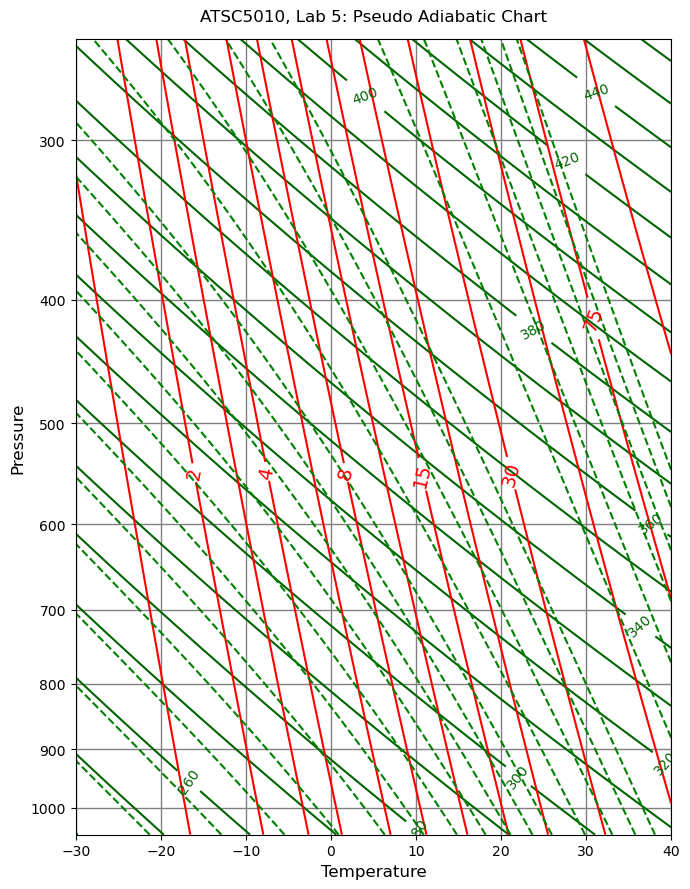

In [12]:
ws_levels = np.array([0.5, 1, 2, 3, 4, 6, 8, 11, 15, 20, 30, 50, 75, 125], dtype=int)
vals = [1000, 900, 800, 700, 600, 500, 400, 300]
levels = np.arange(240,480,10)
#equivalent potential temperature levels
ept_levels1 = np.arange(250, 360, 10).tolist()
ept_levles2 = np.arange(370, 450, 20).tolist()
ept_levels3 = np.arange(510, 870, 60).tolist()
ept_levels = ept_levels1+ept_levles2+ept_levels3
################################################
loc = [(-18, 550), (-10, 550), (0, 550), (10, 550), (20, 550),(35, 400)]
fig, ax = plt.subplots(figsize=(7, 9))
ax1 = ax.contour(temperature, pressure, potential_temperature, levels=levels, colors='darkgreen')  #potential temperature
ax.clabel(ax1, levels[::2], fmt='%d', fontsize=10)
ax2 = ax.contour(temperature, pressure, saturation_mixing_ratio*1000, levels=ws_levels, colors='red') #saturation mixing ratio
ax.clabel(ax2, ws_levels[::2], fmt='%d', inline_spacing=2 ,fontsize=14, manual=loc)
ax3 = ax.contour(temperature, pressure, equivalent_potential_temperature, levels=ept_levels, colors='green', linestyles='--') #equilvalent potential temperature
ax.set_yscale('log') 
ax.set_ylim(1050, 250)
ax.set_xlim(-30, 40)
ax.set_yticks(ticks=vals, labels=vals)
ax.set_xlabel('Temperature', fontsize=12)
ax.set_ylabel('Pressure', fontsize=12)
ax.grid(visible=True, linestyle='solid',color='grey', linewidth=1)
ax.set_title("ATSC5010, Lab 5: Pseudo Adiabatic Chart", fontsize=12, pad=13)
plt.tight_layout()
fig.savefig('lab5.png', dpi=100)

## PLOT WITH INDICATED PARCEL CHANGES

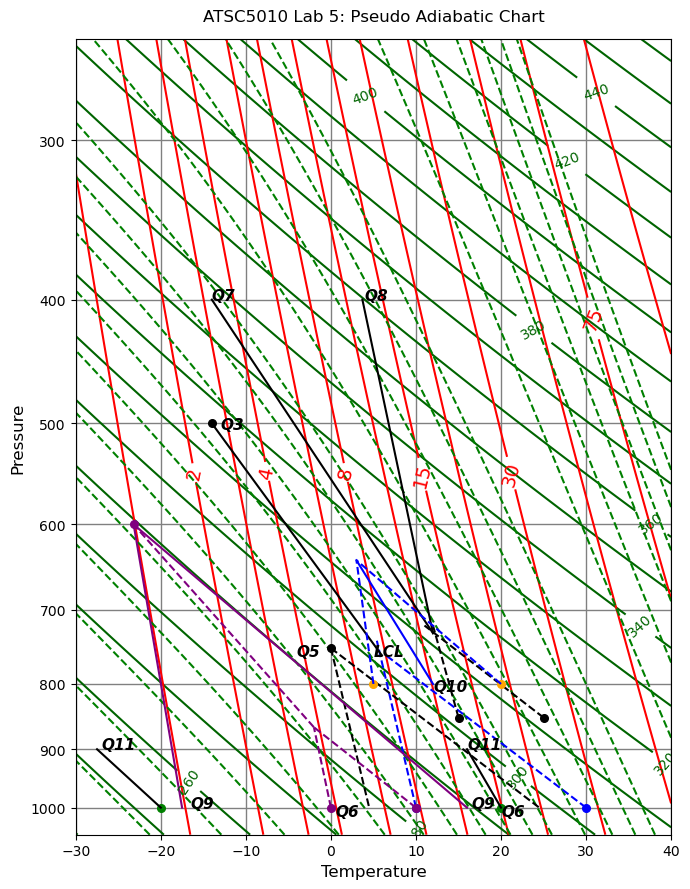

In [13]:
ws_levels = np.array([0.5, 1, 2, 3, 4, 6, 8, 11, 15, 20, 30, 50, 75, 125], dtype=int)
vals = [1000, 900, 800, 700, 600, 500, 400, 300]
levels = np.arange(240,480,10)
#equivalent potential temperature levels
ept_levels1 = np.arange(250, 360, 10).tolist()
ept_levles2 = np.arange(370, 450, 20).tolist()
ept_levels3 = np.arange(510, 870, 60).tolist()
ept_levels = ept_levels1+ept_levles2+ept_levels3
################################################
loc = [(-18, 550), (-10, 550), (0, 550), (10, 550), (20, 550),(35, 400)]
fig, ax = plt.subplots(figsize=(7, 9))
ax1 = ax.contour(temperature, pressure, potential_temperature, levels=levels, colors='darkgreen')  #potential temperature
ax.clabel(ax1, levels[::2], fmt='%d', fontsize=10)
ax2 = ax.contour(temperature, pressure, saturation_mixing_ratio*1000, levels=ws_levels, colors='red') #saturation mixing ratio
ax.clabel(ax2, ws_levels[::2], fmt='%d', inline_spacing=2 ,fontsize=14, manual=loc)
ax3 = ax.contour(temperature, pressure, equivalent_potential_temperature, levels=ept_levels, colors='green', linestyles='--') #equilvalent potential temperature
ax.set_yscale('log') 
ax.set_ylim(1050, 250)
ax.set_xlim(-30, 40)
ax.set_yticks(ticks=vals, labels=vals)
ax.set_xlabel('Temperature', fontsize=12)
ax.set_ylabel('Pressure', fontsize=12)
ax.grid(visible=True, linestyle='solid',color='grey', linewidth=1)
ax.set_title("ATSC5010 Lab 5: Pseudo Adiabatic Chart", fontsize=12, pad=13)
plt.tight_layout()


### QUESTION 2
ax.plot(30, 1000, color='blue', marker='.', markersize=11)
ax.plot(10, 1000, color='blue', marker='.', markersize=11)
ax.plot([10, 5.4], [1000, 740], color='blue', linestyle='--') # line connecting mixing ratio
ax.plot([30, 6.5],[1000, 760], color='blue', linestyle='--') #line following potential temperature
ax.text(5, 760, 'LCL', style='italic', fontsize=11, fontweight='bold'); #added text(Q2) to indicated point

#QUESTION 3
ax.plot(-14, 500,color='black',marker='.', markersize=11)
ax.plot([6, -14],[760, 500], color='black') #line following potential temperature
ax.text(-13, 505, 'Q3', style='italic', fontsize=11, fontweight='bold'); #added text(Q3) to indicated point

#QUESTION 5
ax.plot(0, 750, color='black', marker='.', markersize=11)
ax.text(-4, 760, 'Q5', style='italic', fontsize=11, fontweight='bold'); #added text(Q5) to indicated point

#QUESTION 6
ax.plot([0, 24.5],[750, 1000], color='black', linestyle='--') #line following potential temperature
ax.plot([0, 4.5],[750, 1000], color='black', linestyle='--') #line following mixing ratio.
ax.text(0.5, 1015, 'Q6', style='italic', fontsize=11, fontweight='bold'); #added text(Q6) to indicated point
ax.text(20, 1015, 'Q6', style='italic', fontsize=11, fontweight='bold'); #added text(Q6) to indicated point

#QUESTION 7
ax.plot(25, 850, color='black', marker='.', markersize=11)
ax.plot(15, 850, color='black', marker='.', markersize=11)
ax.plot([25, 11],[850, 720], color='black', linestyle='--') #line following potential temperature.
ax.plot([15, 12],[850, 720], color='black', linestyle='--') #line following mixing ratio.
ax.plot([12, -14],[730, 400], color='black') #line following pseudo adiabats.
ax.text(-14, 400, 'Q7', style='italic', fontsize=11, fontweight='bold'); #added text(Q7) to indicated point

#QUESTION 8
ax.plot([12, 3.7],[730, 400], color='black') #line following saturated adiabats.
ax.text(4, 400, 'Q8', style='italic', fontsize=11, fontweight='bold'); #added text(Q8) to indicated point

#QUESTION 9
ax.plot(0, 1000, color='purple', marker='.', markersize=11) #dew point
ax.plot(10, 1000, color='purple', marker='.', markersize=11) #temperature point
ax.plot([10, -2],[1000, 865], color='purple', linestyle='--') #line following potential temperature.
ax.plot([0, -2],[1000, 865], color='purple', linestyle='--') #line following mixing ratio.
ax.plot([-2, -23.2],[865, 600], color='purple', linestyle='--') #line following saturated adiabats.
ax.plot(-23.2, 600, color='purple', marker='.', markersize=11) #at 600 mb
ax.plot([-23.2, 16],[600, 1000], color='purple')  #tracing back to 1000 mb following dry adiabat.
ax.plot([-23.2, -17.5],[600, 1000], color='purple') #tracing back to 1000 mb following mixing ratio.
ax.text(-16.5, 1000, 'Q9', style='italic', fontsize=11, fontweight='bold'); #added text(Q9) to indicated point
ax.text(16.5, 1000, 'Q9', style='italic', fontsize=11, fontweight='bold'); #added text(Q8) to indicated point

#QUESTION 10
ax.plot(20, 800, color='orange', marker='.', markersize=11) #temperature
ax.plot(5, 800, color='orange', marker='.', markersize=11) #dewpoint temperature
ax.plot([20, 3],[800, 640], color='blue', linestyle='--') #line following potential temperature.
ax.plot([5, 3],[800, 640], color='blue', linestyle='--') #line following mixing ratio.
ax.plot([3, 12],[640, 800], color='blue') #wet bulb temperature
ax.text(12, 810, 'Q10', style='italic', fontsize=11, fontweight='bold')

#QUESTION 11
ax.plot(-20, 1000, color='green', marker='.', markersize=11) #temperature
ax.plot(20, 1000, color='green', marker='.', markersize=11) #temperature
ax.plot([-20, -27.5],[1000, 900], color='black')
ax.plot([20, 16], [1000, 900], color='black')
ax.text(-27, 900, 'Q11', style='italic', fontsize=11, fontweight='bold')
ax.text(16, 900, 'Q11', style='italic', fontsize=11, fontweight='bold')

#savefig
fig.savefig('lab5-indicated-parcel-changes.jpg', dpi=100)

<h1>QUESTIONS</h1>
<div>
    <ol>
        <li>Consider a parcel at 1000 mb, with a temperature of 30 C, and a dewpoint of 10 C. What is the mixing ratio and saturation mixing ratio of the parcel?</li>
        <li>For the parcel in (1), what is the pressure and temperature at the LCL? What is mixing ratio and the dew point at the LCL?</li>
        <li>Continue to raise the parcel to 500 mb. What is the temperature of the parcel? What is the dew point of the parcel? What is the mixing ratio? Is the mixing ratio greater than, less than or the same as it was at the beginning (1000 mb)? If it is different, explain.</li>
        <li>At 500 mb, is the parcel warmer, colder, or the same as the temperature would be for a similar parcel beginning at 1000 mb with a temperature of 30 C being lifted to 500 mb that does not saturate. If the final temperatures are different explain why.</li>
        <li>Take a saturated parcel at 750 mb and a temperature of 0C. What is the mixing ratio? What is the saturation mixing ratio?</li>
        <li>Let the parcel descend to 1000 mb. What is the new temperature, dew point, mixing ratio, and saturation mixing ratio?</li>
        <li>Begin with a parcel at 850 mb, with a temperature of 25 C and a dew point of 15 C. Raise the parcel to 400 mb. What is the mixing ratio and temperature of the parcel? Is the parcel saturated?        </li>
        <li>If the process in (7) were allowed to follow a saturated adiabat (instead of a pseudo-adiabat) in its ascent to 400 mb, would the final temperature be greater, less, or the same as your answer to (7)? Explain.</li>
        <li>Begin with a parcel at 1000 mb with a temperature of 10 C and dew point of 0C. Raise the parcel to 600 mb. Then, allow the parcel to descend back to 1000 mb. Is the final temperature different than the initial temperature? What about the final dewpoint compared to the initial dew point? Explain.</li>
        <li>Consider wet-bulb temperature. The Wet Bulb Temperature is defined as the temperature to which a parcel of air is cooled by evaporating water into it at constant pressure until the air is saturated. One can estimate the wet bulb temperature using a pseudo-adiabatic chart by taking a parcel with an initial temperature and dew point, raising the parcel until saturation is reached, and then following a pseudo-adiabat back down to the original level. What is the wet-bulb temperature for a parcel at 800 mb with a temperature of 20 C and a dew point of 5 C?</li>
        <li>The distance between 900 mb and 1000 mb is roughly 1 km. Consider a layer that has an average temperature of about -20 C. Estimate the pseudo-adiabatic lapse rate between 1000 and 900 mb based on your chart. Compare this to an estimated pseudo-adiabatic lapse rate between the same pressure levels for a layer that has an average temperature of 20 C. Why the difference?  Note that the dry adiabatic lapse rate is the same (9.8 C/km) for both layers. Which layer (the colder or the warmer) has a pseudo-adiabatic lapse rate closer to the dry adiabatic lapse rate? Explain.</li>
    </ol>
</div>

 <br/>
 <hr>
 <br/>
 
 <h1>ANSWERS</h1>
 
<div>
    <ol>
        <li>The <b>mixing ratio</b> and <b>saturation mixing ratio</b> of the parcel are <kbd>7.5 g/kg</kbd> and <kbd>27 g/kg</kbd> respectively.</li>
         <li>The <b>pressure</b> and <b>temperature</b> at LCL is <kbd>750 mb</kbd> and <kbd>6 °C</kbd> respectively. The <b>mixing ratio</b> and the <b>dew point</b> at LCL are <kbd>7.9 g/kg</kbd> and            <kbd> 6 °C</kbd>
        </li>
        <li>The <b>temperature</b>, the <b>dew point</b> and the <b>mixing ratio</b> of the parcel are <kbd>-14 °C</kbd>, <kbd>-14 °C</kbd> and <kbd>3 g/kg</kbd>. The mixing ratio is less than as the parcel was at 1000 mb because the condensed water/liquid is not available. </li>
        <li>If the parcel is lifted to 500 mb without saturation, the parcel will be warmer, because condensation will lead to heat being released. </li>
        <li>The <b>mixing ratio</b> and the <b>saturation mixing ratio</b> will be <kbd>5 g/kg</kbd> and <kbd>5 g/kg</kbd> since at saturation, <kbd>e = es</kbd>. </li>
        <li>The new <b>temperature</b>, <b>dew point</b>, <b>mixing ratio</b> and <b>saturation mixing ratio</b> are <kbd>25 °C</kbd>, <kbd>5 °C</kbd>, <kbd>5 g/kg</kbd> and <kbd>20 g/kg</kbd> respectively.</li>
        <li>The <b>mixing ratio</b> and the <b>temperature</b> of the parcel are <kbd>3.2 g/kg</kbd> and <kbd>-14 °C</kbd> respectively. Yes, the parcel is saturated.</li>
        <li>Following the <b>saturated adiabat</b>, the temperature which is <kbd>4 °C</kbd> would be greater than the answer in <kbd>7</kbd> because the water that has been condensed is having greater latent heat.</li>
        <li>The <b>final temperature</b> which is <kbd>16 °C</kbd> is different than the <b>initial temperature</b> which was <kbd>10 °C</kbd> by <kbd>6 °C</kbd>. The <b>final dew point temperature</b> is <kbd>-16 °C</kbd> lower than the <b>initial temperature</b> which is <kbd>0 °C</kbd> by <kbd>16 °C</kbd> </li>
        <li>The <b>wet-bulb temperature</b> is <kbd>12 °C</kbd>.</li>
        <li>Estimating the pseudo-adiabatic lapse, lifting the parcel from 1000 mb to 900 mb moved from <kbd>-20 °C</kbd> to <kbd>-27 °C</kbd>. The <b>pseudo-adiabatic lapse rate</b> becomes<kbd>-7 °C/km </kbd>. The second parcel, by lifting from 1000 mb to 900 mb also moved from <kbd>20 °C</kbd> to<kbd>16 °C</kbd>. The <b>pseudo-adiabatic lapse rate</b> becomes <kbd>-4 °C/km</kbd>. The <b>colder layer</b> is having it's lapse rate closer to the dry adiabatic lapse rate because the air is very dry, thus the saturation mixing ratio at -20 °C is less or smaller than at 20 °C.</li>
    </ol>
</div>